<a href="https://colab.research.google.com/github/amitkrjha1994/Hakathons/blob/main/House%20Price%20Advance%20Regression/House_Price_Prediction_Challenge.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Analyzing Train and Test Data**

In [1]:
import pandas as pd

In [2]:
df=pd.read_csv("/content/drive/My Drive/Colab Notebooks/Participants_Data_HPP/Train.csv")

In [3]:
df.head()

,POSTED_BY,UNDER_CONSTRUCTION,RERA,BHK_NO.,BHK_OR_RK,SQUARE_FT,READY_TO_MOVE,RESALE,ADDRESS,LONGITUDE,LATITUDE,TARGET(PRICE_IN_LACS)
0,Owner,0,0,2,BHK,1300.236407,1,1,"Ksfc Layout,Bangalore",12.969910,77.597960,55.0
1,Dealer,0,0,2,BHK,1275.000000,1,1,"Vishweshwara Nagar,Mysore",12.274538,76.644605,51.0
2,Owner,0,0,2,BHK,933.159722,1,1,"Jigani,Bangalore",12.778033,77.632191,43.0
3,Owner,0,1,2,BHK,929.921143,1,1,"Sector-1 Vaishali,Ghaziabad",28.642300,77.344500,62.5
4,Dealer,1,0,2,BHK,999.009247,0,1,"New Town,Kolkata",22.592200,88.484911,60.5


In [4]:
df.isnull().sum()

POSTED_BY                0
UNDER_CONSTRUCTION       0
RERA                     0
BHK_NO.                  0
BHK_OR_RK                0
SQUARE_FT                0
READY_TO_MOVE            0
RESALE                   0
ADDRESS                  0
LONGITUDE                0
LATITUDE                 0
TARGET(PRICE_IN_LACS)    0
dtype: int64

In [5]:
df['RESALE'].unique()

array([1, 0])

In [6]:
df['POSTED_BY'].value_counts()

Dealer     18291
Owner      10538
Builder      622
Name: POSTED_BY, dtype: int64

In [7]:
df['UNDER_CONSTRUCTION'].value_counts()

0    24157
1     5294
Name: UNDER_CONSTRUCTION, dtype: int64

In [8]:
df['BHK_OR_RK'].value_counts()

BHK    29427
RK        24
Name: BHK_OR_RK, dtype: int64

In [9]:
df['ADDRESS'].nunique()

6899

In [10]:
df['BHK_NO.'].unique()

array([ 2,  3,  1,  4,  5,  6, 12,  8, 20, 10,  7,  9, 13, 17, 15, 11])

In [11]:
df['BHK_NO.'].value_counts()

2     13324
3     10546
1      3574
4      1723
5       190
6        52
7        11
8        10
15        4
10        4
20        4
12        3
9         3
13        1
11        1
17        1
Name: BHK_NO., dtype: int64

In [12]:
import seaborn as sns

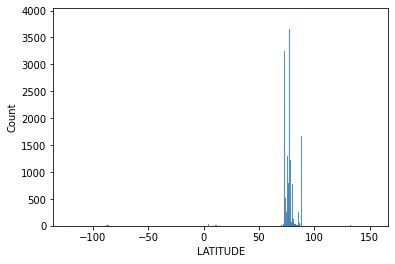

In [13]:
sns.histplot(df['LATITUDE'])

Ok here we found the data is not following any distribution so we need to scale and transform the **LATITUDE** column

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


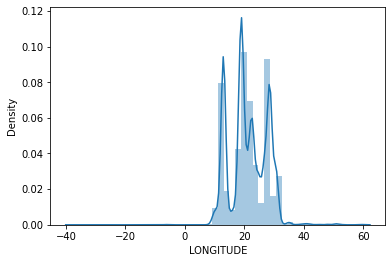

In [14]:
sns.distplot(df['LONGITUDE'])

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


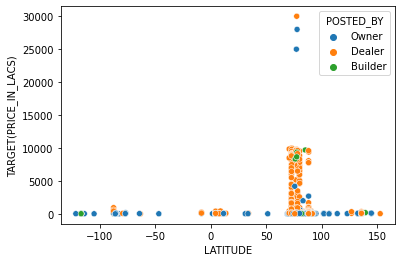

In [15]:
sns.scatterplot(df['LATITUDE'],df['TARGET(PRICE_IN_LACS)'],hue=df['POSTED_BY'])

In [16]:
test=pd.read_csv("/content/drive/My Drive/Colab Notebooks/Participants_Data_HPP/Test.csv")

In [17]:
test.head()

,POSTED_BY,UNDER_CONSTRUCTION,RERA,BHK_NO.,BHK_OR_RK,SQUARE_FT,READY_TO_MOVE,RESALE,ADDRESS,LONGITUDE,LATITUDE
0,Owner,0,0,1,BHK,545.171340,1,1,"Kamrej,Surat",21.262000,73.047700
1,Dealer,1,1,2,BHK,800.000000,0,0,"Panvel,Lalitpur",18.966114,73.148278
2,Dealer,0,0,2,BHK,1257.096513,1,1,"New Town,Kolkata",22.592200,88.484911
3,Dealer,0,0,3,BHK,1400.329489,1,1,"Kalwar Road,Jaipur",26.988300,75.584600
4,Owner,0,0,1,BHK,430.477830,1,1,"Mai Mandir,Nadiad",22.700000,72.870000


In [18]:
test['POSTED_BY'].unique()

array(['Owner', 'Dealer', 'Builder'], dtype=object)

In [19]:
test['UNDER_CONSTRUCTION'].unique()

array([0, 1])

In [20]:
test['BHK_NO.'].value_counts()

2     30998
3     24756
1      8383
4      4001
5       394
6       106
7        17
8        15
9        13
12       13
10        8
20        6
11        4
13        3
16        1
18        1
31        1
Name: BHK_NO., dtype: int64

In [21]:
df['RERA'].value_counts()

0    20088
1     9363
Name: RERA, dtype: int64

In [22]:
test.isnull().sum()

POSTED_BY             0
UNDER_CONSTRUCTION    0
RERA                  0
BHK_NO.               0
BHK_OR_RK             0
SQUARE_FT             0
READY_TO_MOVE         0
RESALE                0
ADDRESS               0
LONGITUDE             0
LATITUDE              0
dtype: int64

### **Handling Categorical Features**

In [23]:
df.head()

,POSTED_BY,UNDER_CONSTRUCTION,RERA,BHK_NO.,BHK_OR_RK,SQUARE_FT,READY_TO_MOVE,RESALE,ADDRESS,LONGITUDE,LATITUDE,TARGET(PRICE_IN_LACS)
0,Owner,0,0,2,BHK,1300.236407,1,1,"Ksfc Layout,Bangalore",12.969910,77.597960,55.0
1,Dealer,0,0,2,BHK,1275.000000,1,1,"Vishweshwara Nagar,Mysore",12.274538,76.644605,51.0
2,Owner,0,0,2,BHK,933.159722,1,1,"Jigani,Bangalore",12.778033,77.632191,43.0
3,Owner,0,1,2,BHK,929.921143,1,1,"Sector-1 Vaishali,Ghaziabad",28.642300,77.344500,62.5
4,Dealer,1,0,2,BHK,999.009247,0,1,"New Town,Kolkata",22.592200,88.484911,60.5


In [24]:
X_df=df.drop('TARGET(PRICE_IN_LACS)',axis=1)
y_df=df['TARGET(PRICE_IN_LACS)']

In [25]:
X_df.head()

,POSTED_BY,UNDER_CONSTRUCTION,RERA,BHK_NO.,BHK_OR_RK,SQUARE_FT,READY_TO_MOVE,RESALE,ADDRESS,LONGITUDE,LATITUDE
0,Owner,0,0,2,BHK,1300.236407,1,1,"Ksfc Layout,Bangalore",12.969910,77.597960
1,Dealer,0,0,2,BHK,1275.000000,1,1,"Vishweshwara Nagar,Mysore",12.274538,76.644605
2,Owner,0,0,2,BHK,933.159722,1,1,"Jigani,Bangalore",12.778033,77.632191
3,Owner,0,1,2,BHK,929.921143,1,1,"Sector-1 Vaishali,Ghaziabad",28.642300,77.344500
4,Dealer,1,0,2,BHK,999.009247,0,1,"New Town,Kolkata",22.592200,88.484911


In [26]:
y_df.head()

0    55.0
1    51.0
2    43.0
3    62.5
4    60.5
Name: TARGET(PRICE_IN_LACS), dtype: float64

In [27]:
test.head()

,POSTED_BY,UNDER_CONSTRUCTION,RERA,BHK_NO.,BHK_OR_RK,SQUARE_FT,READY_TO_MOVE,RESALE,ADDRESS,LONGITUDE,LATITUDE
0,Owner,0,0,1,BHK,545.171340,1,1,"Kamrej,Surat",21.262000,73.047700
1,Dealer,1,1,2,BHK,800.000000,0,0,"Panvel,Lalitpur",18.966114,73.148278
2,Dealer,0,0,2,BHK,1257.096513,1,1,"New Town,Kolkata",22.592200,88.484911
3,Dealer,0,0,3,BHK,1400.329489,1,1,"Kalwar Road,Jaipur",26.988300,75.584600
4,Owner,0,0,1,BHK,430.477830,1,1,"Mai Mandir,Nadiad",22.700000,72.870000


#### Doing LabelEncoding

In [28]:
from sklearn.preprocessing import LabelEncoder

In [29]:
label_encoder=LabelEncoder()

In [30]:
X_df.head()

,POSTED_BY,UNDER_CONSTRUCTION,RERA,BHK_NO.,BHK_OR_RK,SQUARE_FT,READY_TO_MOVE,RESALE,ADDRESS,LONGITUDE,LATITUDE
0,Owner,0,0,2,BHK,1300.236407,1,1,"Ksfc Layout,Bangalore",12.969910,77.597960
1,Dealer,0,0,2,BHK,1275.000000,1,1,"Vishweshwara Nagar,Mysore",12.274538,76.644605
2,Owner,0,0,2,BHK,933.159722,1,1,"Jigani,Bangalore",12.778033,77.632191
3,Owner,0,1,2,BHK,929.921143,1,1,"Sector-1 Vaishali,Ghaziabad",28.642300,77.344500
4,Dealer,1,0,2,BHK,999.009247,0,1,"New Town,Kolkata",22.592200,88.484911


In [31]:
X_df['POSTED_BY']=label_encoder.fit_transform(X_df['POSTED_BY'])

In [32]:
test['POSTED_BY']=label_encoder.transform(test['POSTED_BY'])

In [33]:
X_df.head()

,POSTED_BY,UNDER_CONSTRUCTION,RERA,BHK_NO.,BHK_OR_RK,SQUARE_FT,READY_TO_MOVE,RESALE,ADDRESS,LONGITUDE,LATITUDE
0,2,0,0,2,BHK,1300.236407,1,1,"Ksfc Layout,Bangalore",12.969910,77.597960
1,1,0,0,2,BHK,1275.000000,1,1,"Vishweshwara Nagar,Mysore",12.274538,76.644605
2,2,0,0,2,BHK,933.159722,1,1,"Jigani,Bangalore",12.778033,77.632191
3,2,0,1,2,BHK,929.921143,1,1,"Sector-1 Vaishali,Ghaziabad",28.642300,77.344500
4,1,1,0,2,BHK,999.009247,0,1,"New Town,Kolkata",22.592200,88.484911


In [34]:
test.head()

,POSTED_BY,UNDER_CONSTRUCTION,RERA,BHK_NO.,BHK_OR_RK,SQUARE_FT,READY_TO_MOVE,RESALE,ADDRESS,LONGITUDE,LATITUDE
0,2,0,0,1,BHK,545.171340,1,1,"Kamrej,Surat",21.262000,73.047700
1,1,1,1,2,BHK,800.000000,0,0,"Panvel,Lalitpur",18.966114,73.148278
2,1,0,0,2,BHK,1257.096513,1,1,"New Town,Kolkata",22.592200,88.484911
3,1,0,0,3,BHK,1400.329489,1,1,"Kalwar Road,Jaipur",26.988300,75.584600
4,2,0,0,1,BHK,430.477830,1,1,"Mai Mandir,Nadiad",22.700000,72.870000


In [35]:
X_df['BHK_OR_RK']=label_encoder.fit_transform(X_df['BHK_OR_RK'])

In [36]:
test['BHK_OR_RK']=label_encoder.transform(test['BHK_OR_RK'])

In [37]:
X_df['BHK_OR_RK'].unique()

array([0, 1])

In [38]:
test['BHK_OR_RK'].unique()

array([0, 1])

In [39]:
X_df.head()

,POSTED_BY,UNDER_CONSTRUCTION,RERA,BHK_NO.,BHK_OR_RK,SQUARE_FT,READY_TO_MOVE,RESALE,ADDRESS,LONGITUDE,LATITUDE
0,2,0,0,2,0,1300.236407,1,1,"Ksfc Layout,Bangalore",12.969910,77.597960
1,1,0,0,2,0,1275.000000,1,1,"Vishweshwara Nagar,Mysore",12.274538,76.644605
2,2,0,0,2,0,933.159722,1,1,"Jigani,Bangalore",12.778033,77.632191
3,2,0,1,2,0,929.921143,1,1,"Sector-1 Vaishali,Ghaziabad",28.642300,77.344500
4,1,1,0,2,0,999.009247,0,1,"New Town,Kolkata",22.592200,88.484911


In [40]:
X_df=X_df.drop('ADDRESS',axis=1)
test=test.drop('ADDRESS',axis=1)

In [41]:
X_df.head()

,POSTED_BY,UNDER_CONSTRUCTION,RERA,BHK_NO.,BHK_OR_RK,SQUARE_FT,READY_TO_MOVE,RESALE,LONGITUDE,LATITUDE
0,2,0,0,2,0,1300.236407,1,1,12.969910,77.597960
1,1,0,0,2,0,1275.000000,1,1,12.274538,76.644605
2,2,0,0,2,0,933.159722,1,1,12.778033,77.632191
3,2,0,1,2,0,929.921143,1,1,28.642300,77.344500
4,1,1,0,2,0,999.009247,0,1,22.592200,88.484911


In [42]:
test.head()

,POSTED_BY,UNDER_CONSTRUCTION,RERA,BHK_NO.,BHK_OR_RK,SQUARE_FT,READY_TO_MOVE,RESALE,LONGITUDE,LATITUDE
0,2,0,0,1,0,545.171340,1,1,21.262000,73.047700
1,1,1,1,2,0,800.000000,0,0,18.966114,73.148278
2,1,0,0,2,0,1257.096513,1,1,22.592200,88.484911
3,1,0,0,3,0,1400.329489,1,1,26.988300,75.584600
4,2,0,0,1,0,430.477830,1,1,22.700000,72.870000


### **Feature Scaling**

In [43]:
from sklearn.preprocessing import RobustScaler

In [44]:
Column_for_X=list(X_df.columns)

In [45]:
Column_for_X

['POSTED_BY',
 'UNDER_CONSTRUCTION',
 'RERA',
 'BHK_NO.',
 'BHK_OR_RK',
 'SQUARE_FT',
 'READY_TO_MOVE',
 'RESALE',
 'LONGITUDE',
 'LATITUDE']

In [46]:
Column_for_test=list(test.columns)

In [47]:
Column_for_test

['POSTED_BY',
 'UNDER_CONSTRUCTION',
 'RERA',
 'BHK_NO.',
 'BHK_OR_RK',
 'SQUARE_FT',
 'READY_TO_MOVE',
 'RESALE',
 'LONGITUDE',
 'LATITUDE']

In [48]:
r_scaler=RobustScaler()

In [49]:
X_df_rescale=r_scaler.fit_transform(X_df)


X_df_rescale=pd.DataFrame(X_df_rescale,columns=Column_for_X)

In [50]:
X_df_rescale.head()

,POSTED_BY,UNDER_CONSTRUCTION,RERA,BHK_NO.,BHK_OR_RK,SQUARE_FT,READY_TO_MOVE,RESALE,LONGITUDE,LATITUDE
0,1.0,0.0,0.0,0.0,0.0,0.192387,0.0,0.0,-0.920910,0.067935
1,0.0,0.0,0.0,0.0,0.0,0.153601,0.0,0.0,-1.003219,-0.168592
2,1.0,0.0,0.0,0.0,0.0,-0.371768,0.0,0.0,-0.943622,0.076428
3,1.0,0.0,1.0,0.0,0.0,-0.376745,0.0,0.0,0.934192,0.005052
4,0.0,1.0,0.0,0.0,0.0,-0.270565,-1.0,0.0,0.218057,2.768983


In [51]:
test_rescale=r_scaler.transform(test)
test_rescale=pd.DataFrame(test_rescale,columns=Column_for_test)
test_rescale.head()

,POSTED_BY,UNDER_CONSTRUCTION,RERA,BHK_NO.,BHK_OR_RK,SQUARE_FT,READY_TO_MOVE,RESALE,LONGITUDE,LATITUDE
0,1.0,0.0,0.0,-1.0,0.0,-0.968061,0.0,0.0,0.060604,-1.060982
1,0.0,1.0,1.0,0.0,0.0,-0.576419,-1.0,-1.0,-0.211154,-1.036029
2,0.0,0.0,0.0,0.0,0.0,0.126086,0.0,0.0,0.218057,2.768983
3,0.0,0.0,0.0,1.0,0.0,0.346218,0.0,0.0,0.738412,-0.431578
4,1.0,0.0,0.0,-1.0,0.0,-1.144332,0.0,0.0,0.230817,-1.105070


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


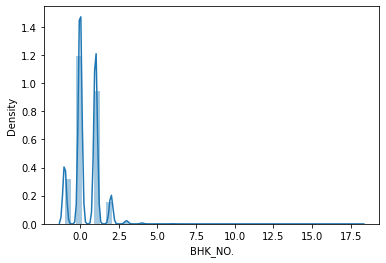

In [52]:

sns.distplot(X_df_rescale['BHK_NO.'])


### **Checking Correlation for Feature Selection**

---



---



In [53]:
X_df_rescale.corr()

,POSTED_BY,UNDER_CONSTRUCTION,RERA,BHK_NO.,BHK_OR_RK,SQUARE_FT,READY_TO_MOVE,RESALE,LONGITUDE,LATITUDE
POSTED_BY,1.000000,-0.263473,-0.285316,-0.072466,-0.027895,0.005415,0.263473,0.332280,-0.049164,0.025425
UNDER_CONSTRUCTION,-0.263473,1.000000,0.363826,-0.040712,0.020719,-0.004204,-1.000000,-0.347405,0.006440,-0.000381
RERA,-0.285316,0.363826,1.000000,0.009547,0.006056,-0.006229,-0.363826,-0.270351,0.104976,-0.065106
BHK_NO.,-0.072466,-0.040712,0.009547,1.000000,-0.045231,0.005303,0.040712,0.014581,0.068730,0.046930
BHK_OR_RK,-0.027895,0.020719,0.006056,-0.045231,1.000000,-0.000292,-0.020719,-0.029346,0.009095,0.000303
SQUARE_FT,0.005415,-0.004204,-0.006229,0.005303,-0.000292,1.000000,0.004204,0.001732,-0.012591,0.000803
READY_TO_MOVE,0.263473,-1.000000,-0.363826,0.040712,-0.020719,0.004204,1.000000,0.347405,-0.006440,0.000381
RESALE,0.332280,-0.347405,-0.270351,0.014581,-0.029346,0.001732,0.347405,1.000000,0.024038,0.014844
LONGITUDE,-0.049164,0.006440,0.104976,0.068730,0.009095,-0.012591,-0.006440,0.024038,1.000000,-0.155062
LATITUDE,0.025425,-0.000381,-0.065106,0.046930,0.000303,0.000803,0.000381,0.014844,-0.155062,1.000000


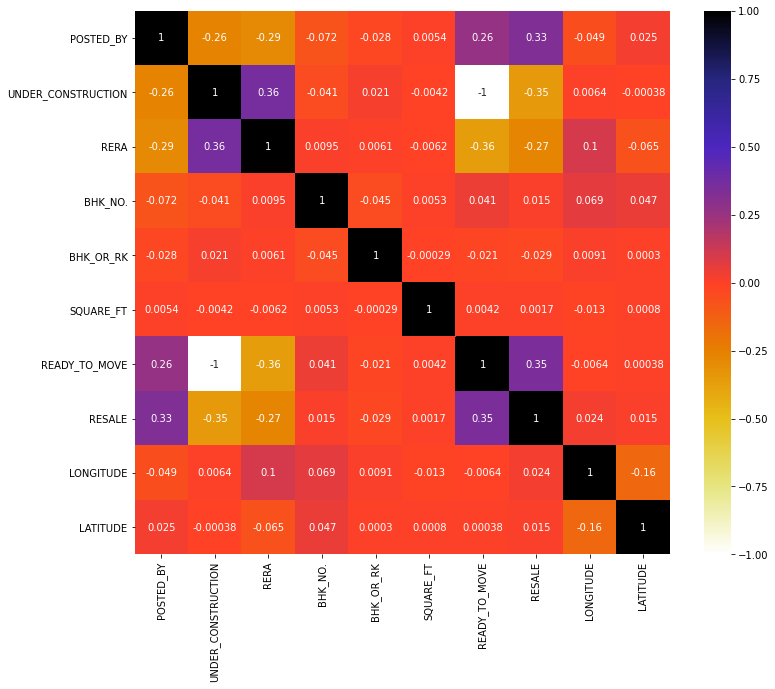

In [54]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,10))
cor = X_df_rescale.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.CMRmap_r)
plt.show()

Here from this visualization we found that there is not so high  co-relation between any feature as such so we requiered to select all the feature in our model creation 

In [55]:
X_df_rescale.head()

,POSTED_BY,UNDER_CONSTRUCTION,RERA,BHK_NO.,BHK_OR_RK,SQUARE_FT,READY_TO_MOVE,RESALE,LONGITUDE,LATITUDE
0,1.0,0.0,0.0,0.0,0.0,0.192387,0.0,0.0,-0.920910,0.067935
1,0.0,0.0,0.0,0.0,0.0,0.153601,0.0,0.0,-1.003219,-0.168592
2,1.0,0.0,0.0,0.0,0.0,-0.371768,0.0,0.0,-0.943622,0.076428
3,1.0,0.0,1.0,0.0,0.0,-0.376745,0.0,0.0,0.934192,0.005052
4,0.0,1.0,0.0,0.0,0.0,-0.270565,-1.0,0.0,0.218057,2.768983


In [56]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_df_rescale,y_df,test_size=0.2,random_state=1)

In [57]:
X_train.shape

(23560, 10)

In [58]:
X_test.shape

(5891, 10)

## **Model Creation and Hyperparameter Tuning**

In [59]:
from sklearn.ensemble import RandomForestRegressor

In [60]:
rfr=RandomForestRegressor()

In [61]:
rfr=rfr.fit(X_train,y_train)

In [62]:
pre1=rfr.predict(X_test)

In [63]:
from sklearn.metrics import accuracy_score,mean_squared_log_error

In [64]:
print(mean_squared_log_error(y_test,pre1))

0.1507290830168901


In [65]:
y_pred=rfr.predict(test_rescale)

In [66]:
y_pred

array([  20.444     ,   76.196     ,   72.94266667, ..., 7023.845     ,
         87.487     ,  566.6       ])

In [67]:
submit=pd.read_csv('/content/drive/My Drive/Colab Notebooks/Participants_Data_HPP/sample_submission.csv')

In [68]:
submit.head()

,TARGET(PRICE_IN_LACS)
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0


In [69]:
submit2=pd.DataFrame(y_pred,columns=['TARGET(PRICE_IN_LACS)'])

In [70]:
submit2.head()

,TARGET(PRICE_IN_LACS)
0,20.444000
1,76.196000
2,72.942667
3,55.409167
4,19.877000


In [71]:
submit2.to_csv("submit.csv")